In [1]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25' 
plt.rcParams['xtick.labelsize'] = '18'
plt.rcParams['ytick.labelsize'] = '18'

%matplotlib inline

In [2]:
# Replace these variables accordingly 
path_to_results1 = "../../experiments/BiVar/2018-11-17-12-52_BiVarScalabilityN_/"

In [4]:
data = pandas.read_csv(path_to_results1 + "BiVarScalabilityN.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

/Users/Mazan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# Sometimes an row may be a copy of the header. If this is the case comment out below lines. They will remove
# the copies save and relode the cleaned data

# data = data[data["refId"] != "refId"]
# data.to_csv(path_to_results1 + "BiVarScalabilityN.csv", index = False)
# data = pandas.read_csv(path_to_results1 + "BiVarScalabilityN.csv", header=0)
# data["category"] = [x.split("-")[0] for x in data["refId"]]

In [14]:
data["testId"].unique()

array(['HoeffdingsD', 'Kendalls Tau', 'MWPr', 'KS', 'MWP', 'MWPu',
       'Surfing', 'Spearman Correlation', 'Jensen Shannon Equity Width',
       'Distance Correlation', 'Mutual Information', 'Correlation', 'MCE',
       'Slope Inversion', 'Slope', 'HSM'], dtype=object)

In [10]:
data['n'].unique()

array([   10,    20,    50,   100,   200,   300,   500,  1000,  2000,
        3000,  5000, 10000])

In [11]:
data["TotalCPUtime"] = data["CPUtime"] + data["prepCPUtime"]

In [12]:
# selected tests are all beside MWPu & MWPr
selectedTestDict = {
    "Correlation" : "Cor", 
    "Mutual Information" : "MI", 
    "Jensen Shannon Equity Width" : "EW",
    "Distance Correlation" : "DCor", 
    "Slope" : "S", 
    "Slope Inversion" : "SI", 
    "Kendalls Tau" : "Tau", 
    "Spearman Correlation" : "SCor", 
    "MCE" : "MCE", 
    "MWP" : "MWP", 
    "KS" : "KS", 
    "HoeffdingsD" : "HD", 
    "Surfing" : "Surf", 
    "HSM" : "HSM"
}

In [97]:
selectedData = data[[str(x) not in ["MWPu", "MWPr", "S"] for x in data["testId"]]]
selectedData["testId"] = [selectedTestDict[x] for x in selectedData["testId"]]

/Users/Mazan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
selectedData.head()

,refId,nDim,n,nRep,testId,alpha,M,Contrast,Walltime,CPUtime,prepWalltime,prepCPUtime,r,category,TotalCPUtime
0,Independent-2-0.0,2,10,500,HD,NaN,NaN,0.234127,20.304419,7.323165,8.960131,0.559763,1,Independent,7.882928
1,Independent-2-0.0,2,10,500,Tau,NaN,NaN,0.511111,13.975886,5.701686,9.346017,0.465846,1,Independent,6.167532
3,Independent-2-0.0,2,10,500,KS,0.1,50.0,0.758000,41.121269,18.680498,12.111818,4.698796,1,Independent,23.379294
4,Independent-2-0.0,2,10,500,MWP,0.5,50.0,0.555337,40.588306,13.846549,19.818194,14.678476,1,Independent,28.525025
6,Independent-2-0.0,2,10,500,Surf,NaN,NaN,0.000000,645.885350,3.789476,7.578193,1.001688,1,Independent,4.791164


In [98]:
test = ['MWP', 'Cor', 'SCor', 'KS','DCor', 'HD', 'EW', 'Tau', 'Surf', 'MI', 'MCE', 'HSM']
test1 = test[:3]
test2 = test[3:6]
test3 = test[6:9]
test4 = test[9:]
tests = [test1, test2, test3, test4]

/Users/Mazan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x11f5b3d30> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x11e482d68> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
 

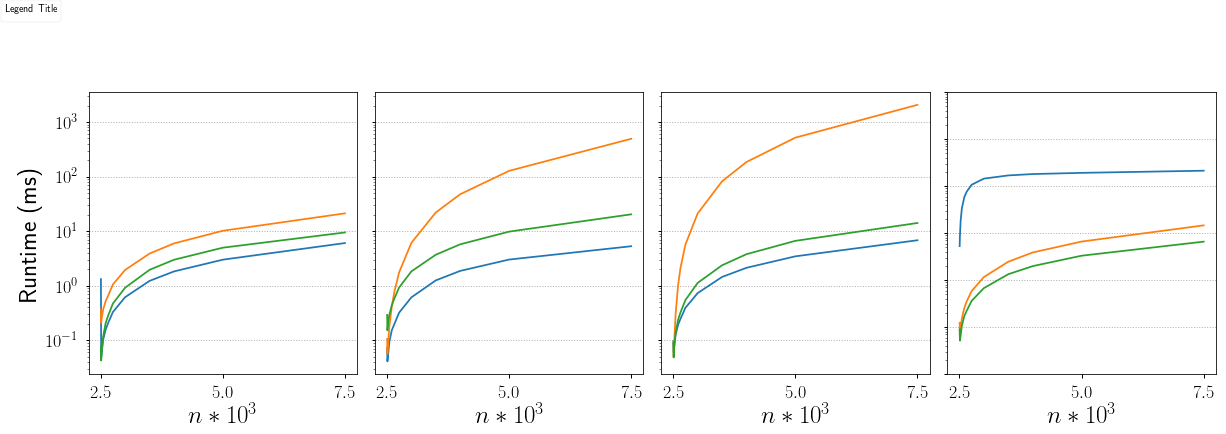

In [101]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(17,6), sharey=True)
axess = axes.reshape(-1)

lg_ax = []

# monochrome=((cycler('marker', ['v', 's', "*"]) * (cycler('linestyle', ['-', '--', ':']))) + 
            # cycler('color', sns.color_palette("cubehelix", 9)) )

for i in range(4):
    # axess[i].set_prop_cycle(monochrome)
    subselectedData = selectedData[[str(x) in tests[i] for x in selectedData["testId"]]]
    subselectedData['n'] = subselectedData['n'] / 1000 
    d = subselectedData.groupby(["n", "testId"])


    means = d.mean()
    errors = d.std()
    ax = means.unstack().plot(y="TotalCPUtime", logy=True, ax=axess[i])

    # ax.legend(ncol=3, fontsize=12, loc="lower right")


    ax.set_ylabel("Runtime (ms)")
    ax.set_xlabel("$n*10^3$")

    ax.set_yticks([0.01, 0.1, 1, 10, 100, 1000, 10000])

    L = ax.legend()
    L.remove()

    ax.set_xticklabels(["$0$", "$2.5$", "$5.0$", "$7.5$", "$10$"])

    ax.grid(True, linestyle='dotted', axis="y")
    
    lg_ax.append(ax)
    
fig.legend(lg_ax,     # The line objects
           labels=test,   # The labels for each line
           loc="upper left",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

    
#handles, labels = ax.get_legend_handles_labels()
#order = [5,6,2,1,4,7,3,0]

#ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
          #loc='upper left', fontsize=15,  bbox_to_anchor=(-1.12, 1.20), ncol=8,
         #handletextpad=0.2, columnspacing=0.7)

plt.tight_layout()
fig.subplots_adjust(top=0.80)
plt.savefig("plots/BiVarFig10.pdf")